In [1]:
import sklearn
import pandas as pd

df = pd.read_csv("biopsy.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']
y = y.replace("M", 1)
y = y.replace("B", 0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/var/folders/gt/yv99s70x75l99bc9w9hl7w840000gn/T/ipykernel_17532/2088645004.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace("B", 0)


In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Step 1: Initialise MLPClassifier
clf = MLPClassifier(random_state=2, max_iter=300)

# Step 2: Fit the model
clf.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=2)

In [4]:
# Step 3: Predict results
predictions = clf.predict(X_test)

# Step 4: Evaluate model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy", accuracy)

Accuracy 0.9736842105263158


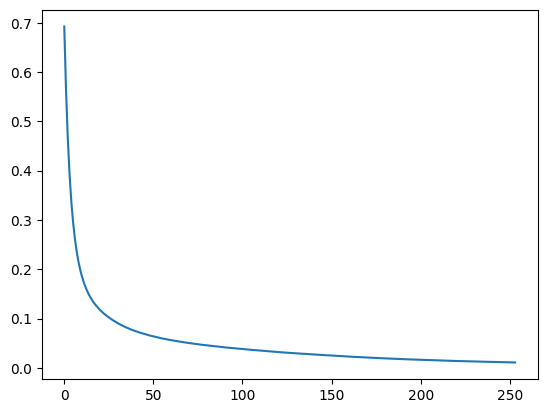

In [5]:
import matplotlib.pyplot as plt

plt.plot(range(0, clf.n_iter_), clf.loss_curve_)
